In [ ]:
pip install kaggle

In [ ]:
from google.colab import files

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
import zipfile
drive.mount('/content/gdrive',force_remount=True)
root_dir="/content/gdrive/My Drive/"
base_dir=root_dir + 'fastai-v3/fastai-1'

Mounted at /content/gdrive


In [ ]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip "/content/chest-xray-pneumonia.zip" -d "/content/gdrive/My Drive/fastai-v3/fastai-1"

unzip:  cannot find or open /content/chest-xray-pneumonia.zip, /content/chest-xray-pneumonia.zip.zip or /content/chest-xray-pneumonia.zip.ZIP.


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [ ]:
bs = 64

In [ ]:
pwd

'/content'

In [ ]:
path=Path('/content/gdrive/MyDrive/fastai-v3/fastai-1/chest_xray')

In [ ]:
path.ls()

[PosixPath('/content/gdrive/MyDrive/fastai-v3/fastai-1/chest_xray/__MACOSX'),
 PosixPath('/content/gdrive/MyDrive/fastai-v3/fastai-1/chest_xray/chest_xray'),
 PosixPath('/content/gdrive/MyDrive/fastai-v3/fastai-1/chest_xray/test'),
 PosixPath('/content/gdrive/MyDrive/fastai-v3/fastai-1/chest_xray/train'),
 PosixPath('/content/gdrive/MyDrive/fastai-v3/fastai-1/chest_xray/val'),
 PosixPath('/content/gdrive/MyDrive/fastai-v3/fastai-1/chest_xray/export.pkl')]

torch.Size([3, 1225, 1632])


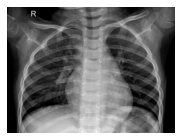

In [ ]:
img = open_image(path/'val'/'NORMAL'/'NORMAL2-IM-1440-0001.jpeg')
print(img.data.shape)
img.show()

In [ ]:
tfms = get_transforms()


In [ ]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path, 
                                  valid='val',
                                  valid_pct=0.2,
                                  size=256, bs=bs,
                               ds_tfms=tfms).normalize(imagenet_stats)

In [ ]:
data

ImageDataBunch;

Train: LabelList (9370 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /content/gdrive/MyDrive/fastai-v3/fastai-1/chest_xray;

Valid: LabelList (2342 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
PNEUMONIA,NORMAL,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: /content/gdrive/MyDrive/fastai-v3/fastai-1/chest_xray;

Test: None

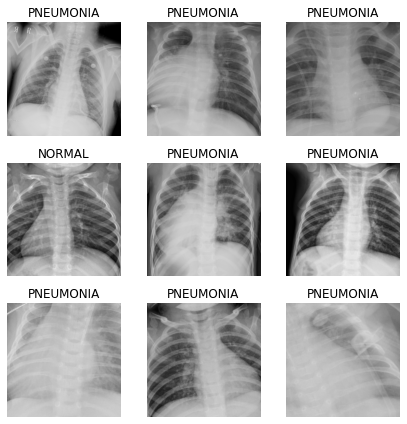

In [ ]:
data.show_batch(3, figsize=(6,6))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['NORMAL', 'PNEUMONIA'], 2, 9370, 2342)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, model_dir="/tmp/model/")

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.305526,0.232785,0.930401,29:30
1,0.182322,0.121672,0.952605,08:08
2,0.126616,0.116076,0.962425,08:06
3,0.117989,0.132119,0.951751,08:05


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()


In [ ]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


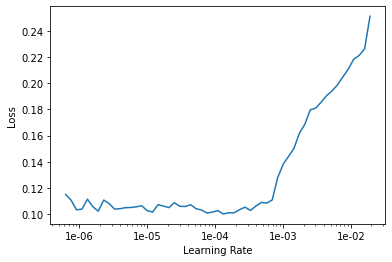

In [ ]:
learn.recorder.plot()


In [ ]:
learn.fit_one_cycle(1, max_lr=slice(3e-5, 3e-4))


epoch,train_loss,valid_loss,accuracy,time
0,0.095244,0.089525,0.972246,08:17


In [ ]:
learn.save('stage-2')


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


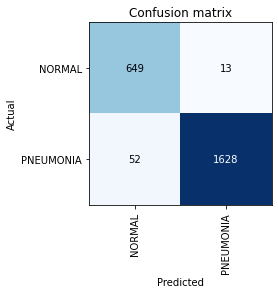

In [ ]:
interp.plot_confusion_matrix()


In [ ]:
interp.most_confused(min_val=2)

[('PNEUMONIA', 'NORMAL', 52), ('NORMAL', 'PNEUMONIA', 13)]

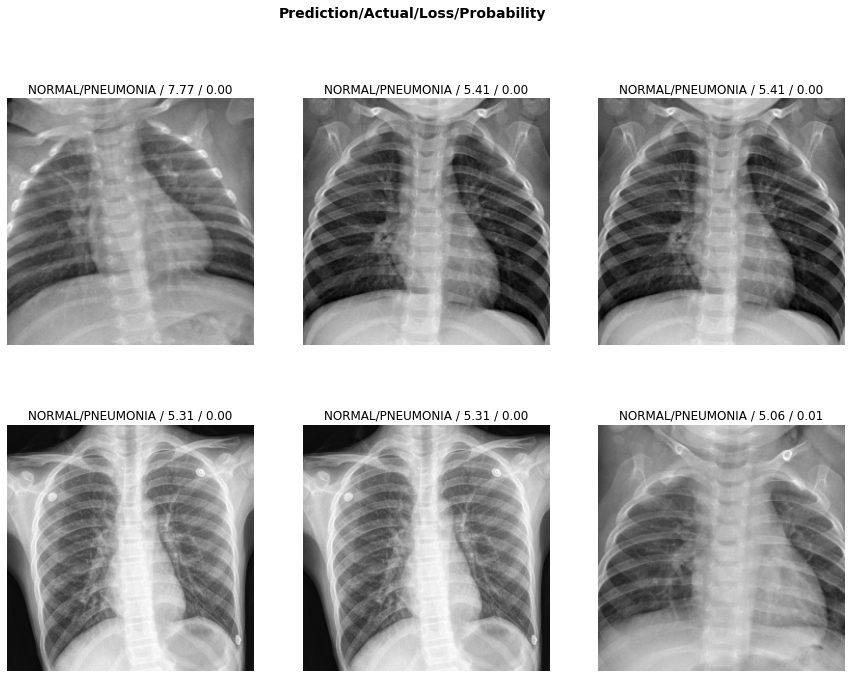

In [ ]:
interp.plot_top_losses(6,figsize=(15,11))

In [ ]:
learn.export()

In [ ]:
learn_inf=load_learner(path)

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

In [ ]:
learn_inf.predict(img)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


(Category tensor(0), tensor(0), tensor([0.7697, 0.2303]))

In [ ]:
from fastai.vision import *
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

NameError: ignored

In [ ]:
import fastai
fastai.__version__

'1.0.61'